In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# LOAD DATA and preprocess the data 
# animal categories
categories = ['dog', 'panda', 'cat']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/Users/ejbeazleigh/Downloads/Animals/' 
#path which contains all the categories of images
for i in categories:
      
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,55,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')
x=np.array(flat_data_arr)
y=np.array(target_arr)

loading... category : dog
loaded category:dog successfully
loading... category : panda
loaded category:panda successfully
loading... category : cat
loaded category:cat successfully


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix 
import seaborn as sns 

#initialise the stratfield k-fold 4 crossval with nsplits defining the no. of folds in this case 10 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# defining support vector classifier model 
SVMmodel= SVC(kernel ='rbf')
# Defining the parameters grid for GridSearchCV
param_grid = {'C':[0.1,10],'gamma':['scale','auto']}

# Creating a model using GridSearchCV with the parameters grid SET CV to 2 as only using this for fine tuning so do not need 10
grid_obj = GridSearchCV(SVMmodel,param_grid,cv = 2,n_jobs = -1)
# checking cell running okay 
print('everythings okay ed!')
#spltting the data into training and validation sets for each fold of the cross validation
for fold, (train_index, val_index) in enumerate(skf.split(x,y)):
    trainX, trainY = x[train_index],y[train_index]
    valX, valY = x[val_index], y[val_index]
    print(trainX.shape)
    print(trainY.shape)

#fit the gridsearch to the training set to help find optimal hyperparamters  
    grid_fit = grid_obj.fit(trainX, trainY)
    print('everythings okay ed, gridfit created!')
    SVMopt = grid_fit.best_params_
#print the best values for each param that will be used moving forward
print("best params: " + str(grid_obj.best_params_))

everythings okay ed!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
(2700, 5280)
(2700,)
everythings okay ed, gridfit created!
best params: {'C': 10, 'gamma': 'scale'}


In [8]:
f1List = []
accuracyList = []
cmList = []

#spltting the data into training and validation sets for each fold of the cross validation
for fold, (train_index, val_index) in enumerate(skf.split(x,y)):
    trainX, trainY = x[train_index],y[train_index]
    valX, valY = x[val_index], y[val_index]
#intialize the SVM model with new found best hyperparameters    
    SVMmodel = SVC(C=SVMopt['C'],gamma=SVMopt['gamma'],kernel='rbf')
#train thr SVM model based on training set    
    SVMmodel.fit(trainX, trainY)
#use validation set to predict and quantify scoring metrics   
    predY = SVMmodel.predict(valX)
    acc = accuracy_score(valY,predY)
    accuracyList.append(acc)
    f1 = f1_score(valY,predY,average='macro')
    f1List.append(f1)
    cm = confusion_matrix(valY,predY)
    cmList.append(cm)
    
    print(f"Fold{fold+1}:accuracy = {acc}, f1score = {f1}")

Fold1:accuracy = 0.7033333333333334, f1score = 0.7050957458605455
Fold2:accuracy = 0.6666666666666666, f1score = 0.6655337735117869
Fold3:accuracy = 0.6066666666666667, f1score = 0.6067963332658116
Fold4:accuracy = 0.6566666666666666, f1score = 0.6510292556538507
Fold5:accuracy = 0.6333333333333333, f1score = 0.6339268954632972
Fold6:accuracy = 0.6166666666666667, f1score = 0.6180322858409032
Fold7:accuracy = 0.6766666666666666, f1score = 0.6775717372732298
Fold8:accuracy = 0.68, f1score = 0.6783521489403842
Fold9:accuracy = 0.6166666666666667, f1score = 0.6202824945321701
Fold10:accuracy = 0.6166666666666667, f1score = 0.6215188770339021


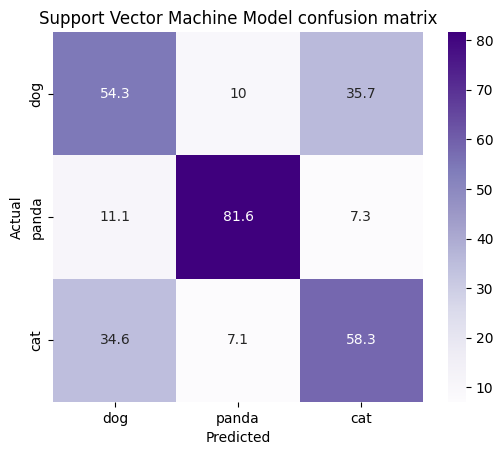

<Figure size 640x480 with 0 Axes>

Mean Accuracy: 0.6473333333333333
Mean f1 Score: 0.6478139547375881


In [10]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix 
import seaborn as sns 

mean_acc = sum(accuracyList)/len(accuracyList)
mean_f1 = sum(f1List)/len(f1List)
meanCM = sum(cmList)/len(cmList)

ax = plt.axes()
sns.heatmap(meanCM,ax=ax,annot=True,fmt='g',cmap='Purples',square=True)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:grey')
ax.set_title('Support Vector Machine Model confusion matrix')
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
print(f"Mean Accuracy: {mean_acc}")
print(f"Mean f1 Score: {mean_f1}")